# PS4 #
# Yuqian Gong #

## 1(a) ##

In [1]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np

In [14]:
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T,
random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)
r = 0.85
sigma = 0.7
mu = 11.4
 
z = np.zeros(500)
z_0 = unif_vec[0]
z[0] = z_0
for i in range(1,500):
    z_p = z[i - 1]
    z_i = r * z_p + (1 - r) * mu + eps_vec[i]
    z[i] = z_i

0.87012413662721189

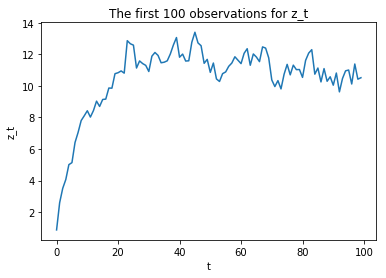

In [6]:
fig_1 = plt.figure()
plt.plot(range(0, 100), z[:100])
plt.title('The first 100 observations for z_t')
plt.xlabel('t')
plt.ylabel('z_t')
fig_1

## 1(b) ##

In [13]:
z_lower = mu - 3 * sigma
z_higher = mu + 3 * sigma 
z_vals = np.linspace(z_lower, z_higher, num = 5)

[1, 9.3000000000000007, 10.350000000000001, 11.4, 12.449999999999999]

## 1(c) ##

In [16]:
min_z = min(z)
max_z = max(z)
p = np.zeros((5, 5))
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
z_bins = [min_z - 1] + list(z_cuts)+ [max_z]
for i in range (0, 5):
    for j in range (0, 5):
        num_c = 0
        num_n = 0
        i_low = z_bins[i]
        i_high = z_bins[i + 1]
        j_low = z_bins[j]
        j_high = z_bins[j + 1]
        for m in range(0, 499):
            if z[m] > i_low and z[m] <= i_high and z[m+1] > j_low and z[m+1] <= j_high:
                num_c += 1
            if z[m] > i_low and z[m] <= i_high:
                num_n += 1
        p[i][j] = num_c/num_n
p

array([[ 0.75757576,  0.21212121,  0.03030303,  0.        ,  0.        ],
       [ 0.09821429,  0.51785714,  0.33928571,  0.04464286,  0.        ],
       [ 0.03184713,  0.22292994,  0.47770701,  0.23566879,  0.03184713],
       [ 0.        ,  0.04273504,  0.34188034,  0.5042735 ,  0.11111111],
       [ 0.        ,  0.        ,  0.04255319,  0.34042553,  0.61702128]])

##  1(d) ##

In [20]:
import numpy.linalg as LA

t = np.array([[0],[0],[1],[0],[0]])
t_3= np.dot(LA.matrix_power(p.T, 3), t)
t_3[4]

array([ 0.07800906])

## 1(e) ##

In [23]:
eigvals, eigvecmat = LA.eig(p.T)
eigvec = eigvecmat[:, 1] / eigvecmat[:, 1].sum()
stat_dist = eigvec
stat_dist

array([ 0.13226453,  0.2244489 ,  0.31462926,  0.23446894,  0.09418838])

## 1(d) ##

In [24]:
len(unif_vec)

500

In [25]:
T = 500
z1_0 = z_vals[2]
z1_vec = np.zeros(T)

z_t = z1_0
zt_ind = 1
for t_ind in range(T):
    # Calculate new index and new value
    ztp1_ind = \
        np.argwhere(unif_vec[t_ind] <= np.cumsum(p[zt_ind, :])).min()
    z_tp1 = z_vals[ztp1_ind]
    z1_vec[t_ind] = z_tp1
    
    # Update the current value and its index in the loop
    z_t = z_tp1
    zt_ind = ztp1_ind

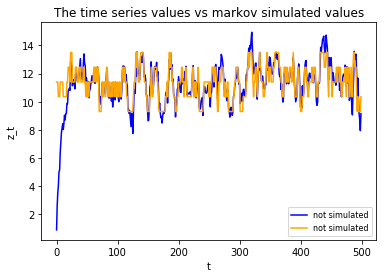

In [28]:
fig_2 = plt.figure()
plt.plot(range(0, 500), z, color = "blue", label = "not simulated")
plt.plot(range(0, 500), z1_vec, color = "orange", label = "not simulated")
plt.title('The time series values vs markov simulated values')
plt.xlabel('t')
plt.ylabel('z_t')
plt.legend(loc='lower right',prop={'size': 8})
fig_2